# 时间序列数据与时间序列预测

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")#不显示警告信息

In [119]:
df = pd.read_csv('time_series_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [120]:
# 按照天聚合数据

df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df_ts = df.resample('D').sum()
df_ts

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60
...,...,...
2014-09-21,436308,9102
2014-09-22,436884,14116
2014-09-23,437460,13304


In [121]:
#2012 年 8 月- 2013 年 10 月用作训练数据，2013 年 11 月 – 2013 年 12 月用作测试数据。
train = df_ts['2012-08-25':'2013-10-31']
test = df_ts['2013-11-1':'2013-12-31']
train.tail()

,ID,Count
Datetime,,
2013-10-27,246804,2082
2013-10-28,247380,3536
2013-10-29,247956,4030
2013-10-30,248532,3774
2013-10-31,249108,3408


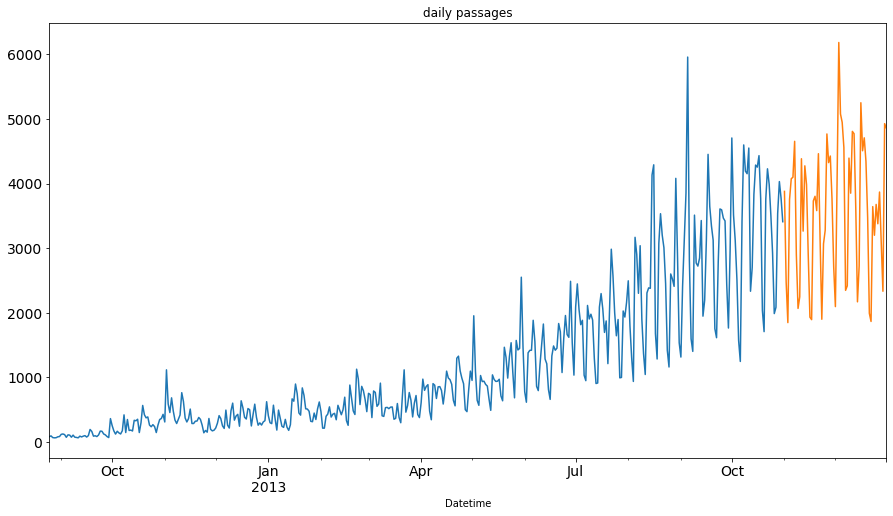

In [122]:
#数据可视化
train.Count.plot(figsize=(15,8), title= 'daily passages', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'daily passages', fontsize=14)
plt.show()

In [6]:
#朴素法：假设第一个预测点和上一个观察点相等的预测方法
dd = np.asarray(train['Count'])#训练组数据
y_hat = test.copy()#测试组数据
y_hat['naive'] = dd[len(dd) - 1]#预测组数据

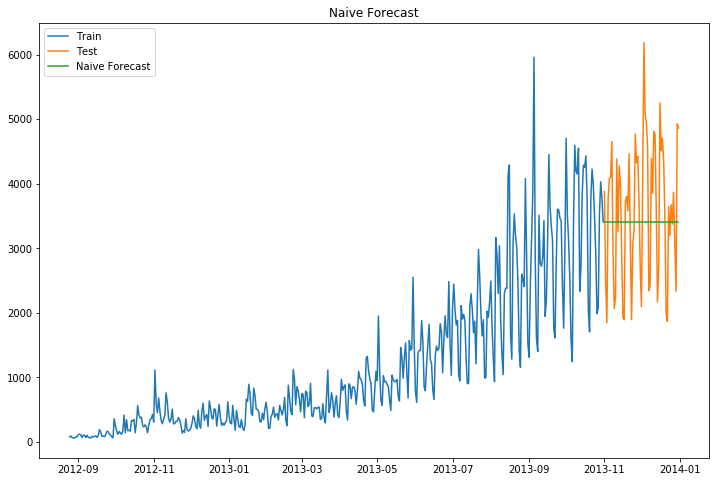

In [7]:
#数据可视化
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [8]:
#计算均方根误差RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# mean_squared_error()均方根值  
rmse = sqrt(mean_squared_error(test['Count'], y_hat['naive']))
print(rmse)

1053.9937474540022


In [9]:
#简单平均法
y_hat_avg = test.copy() 
y_hat_avg['avg_forecast'] = train['Count'].mean()

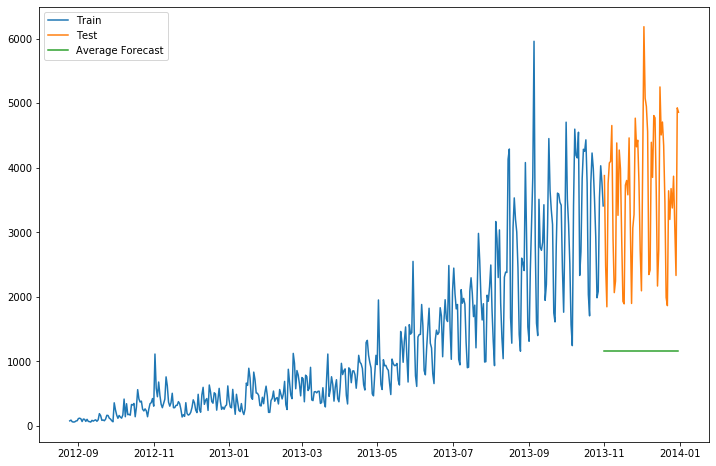

In [10]:
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['Count'], y_hat_avg['avg_forecast']))
print(rmse)

2637.2463664998872


In [12]:
#移动平均法
y_hat_avg = test.copy()
#时间窗函数rolling求平均值
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]

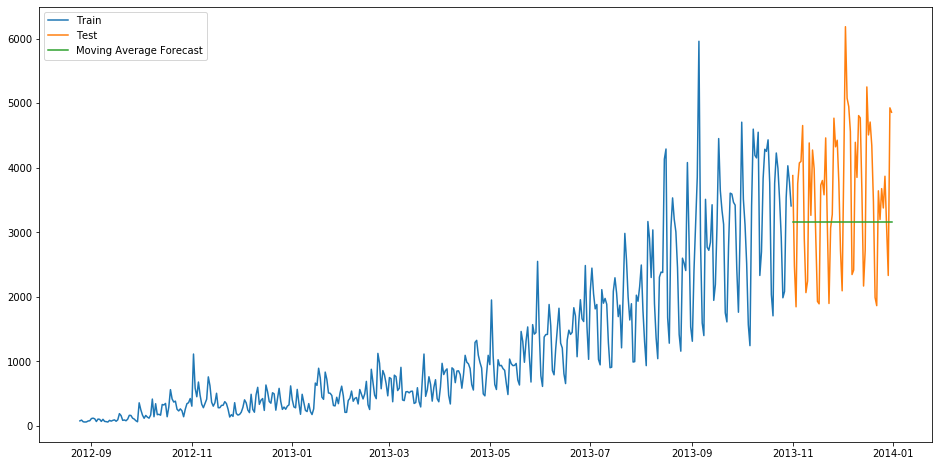

In [13]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['Count'], y_hat_avg['moving_avg_forecast']))
print(rmse)

1121.4817740256713


In [15]:
#指数平滑法
#一次指数平滑
from statsmodels.tsa.api import SimpleExpSmoothing
 
y_hat_avg = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit.forecast(len(test))

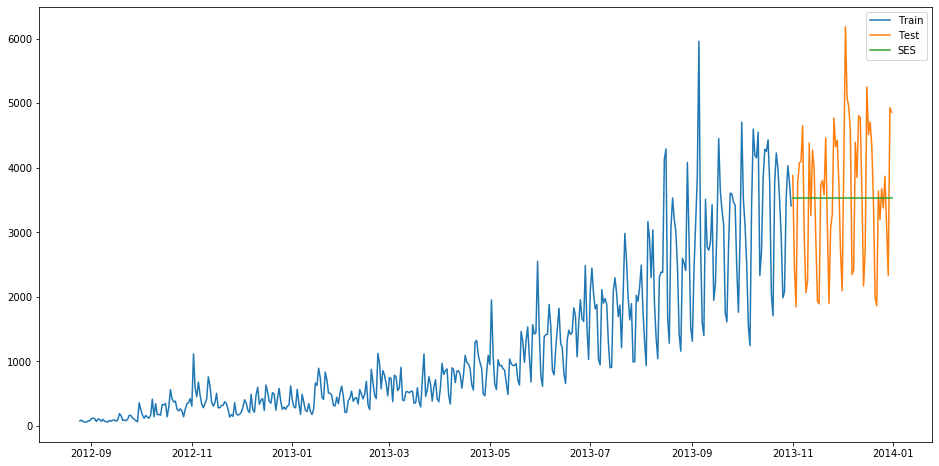

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [17]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['Count'], y_hat_avg['SES']))
print(rmse)

1040.5830054054757


In [19]:
#二次指数平滑
from statsmodels.tsa.api import Holt
 
y_hat_avg = test.copy()
 
fit = Holt(np.asarray(train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(test))

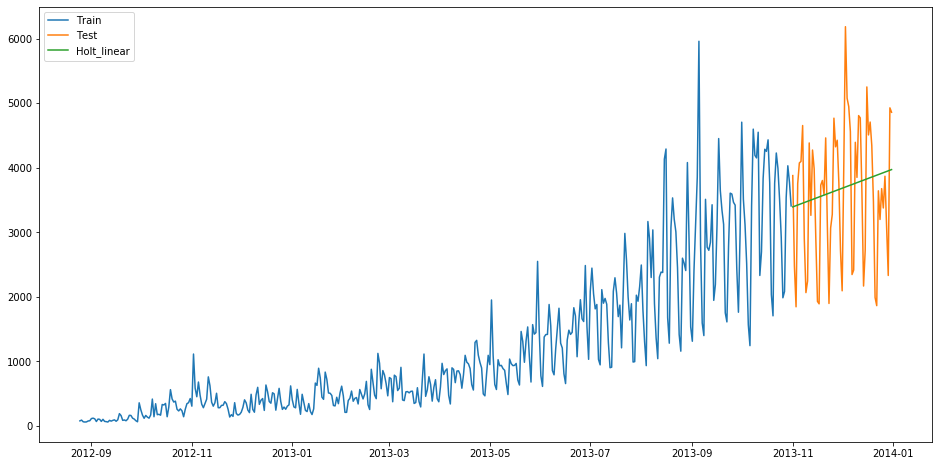

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [21]:

from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_linear']))
print(rmse)

1033.350230676175


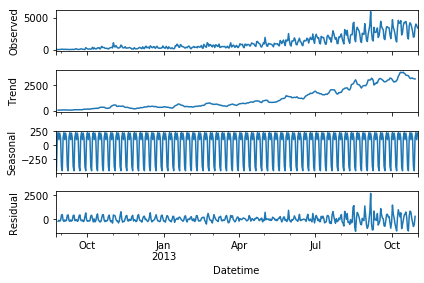

In [123]:
#三次指数平滑
import statsmodels.api as sm
 
sm.tsa.seasonal_decompose(train['Count']).plot()
#ADF检验
#result = sm.tsa.stattools.adfuller(train['Count'])
#print(result)
plt.show() 

In [132]:
#显示所有行
pd.set_option('display.max_rows', None)
sm.tsa.seasonal_decompose(train['Count']).seasonal#获取季节分解后数据

Datetime
2012-08-25   -373.876882
2012-08-26   -450.378053
2012-08-27    147.912345
2012-08-28    226.600870
2012-08-29    103.116092
2012-08-30    220.839746
2012-08-31    125.785882
2012-09-01   -373.876882
2012-09-02   -450.378053
2012-09-03    147.912345
2012-09-04    226.600870
2012-09-05    103.116092
2012-09-06    220.839746
2012-09-07    125.785882
2012-09-08   -373.876882
2012-09-09   -450.378053
2012-09-10    147.912345
2012-09-11    226.600870
2012-09-12    103.116092
2012-09-13    220.839746
2012-09-14    125.785882
2012-09-15   -373.876882
2012-09-16   -450.378053
2012-09-17    147.912345
2012-09-18    226.600870
2012-09-19    103.116092
2012-09-20    220.839746
2012-09-21    125.785882
2012-09-22   -373.876882
2012-09-23   -450.378053
2012-09-24    147.912345
2012-09-25    226.600870
2012-09-26    103.116092
2012-09-27    220.839746
2012-09-28    125.785882
2012-09-29   -373.876882
2012-09-30   -450.378053
2012-10-01    147.912345
2012-10-02    226.600870
2012-10-03    10

In [124]:
from statsmodels.tsa.api import ExponentialSmoothing
 
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

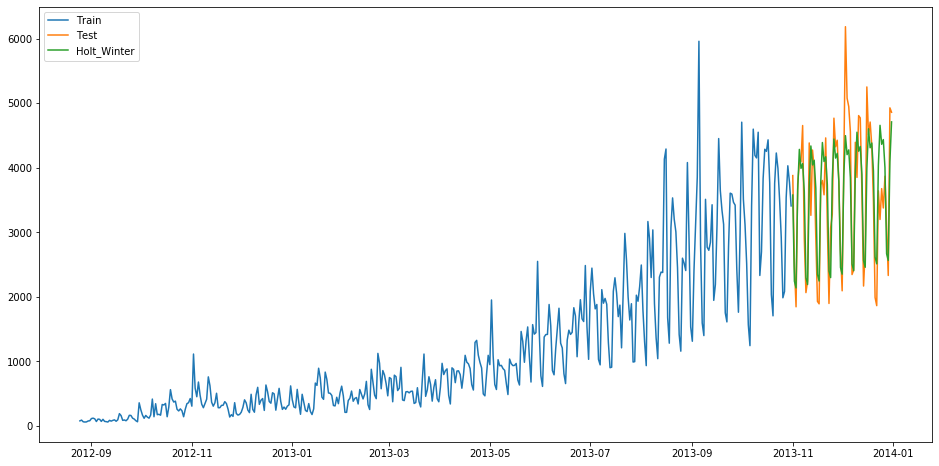

In [125]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rmse = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_Winter']))
print(rmse)

575.0758215878234


In [105]:
#AR模型
from statsmodels.tsa.arima_model import ARIMA

# train autoregression
ts_ar= train['Count'].astype(float)
fit1 = ARIMA(ts_ar, order=(7, 0, 0)).fit()  
y_hat_ar= fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)

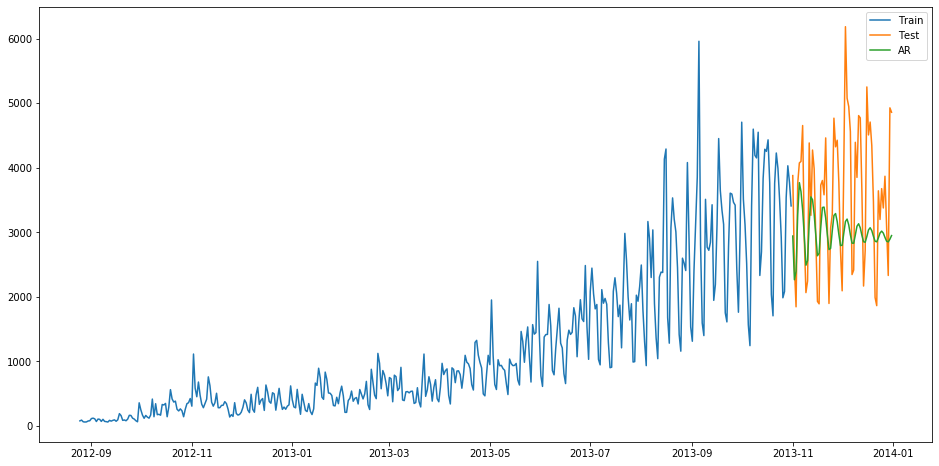

In [134]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_ar, label='AR')
plt.legend(loc='best')
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Count'], y_hat_ar.to_frame()))
print(rmse)

1073.3560241491946


In [149]:
#MA模型
from statsmodels.tsa.arima_model import ARIMA

# train autoregression
ts_ma= train['Count'].astype(float)
fit1 = ARIMA(ts_ma, order=(0, 0, 7)).fit()  
y_hat_ma = fit1.predict(start="2013-11-01", end="2013-12-31", dynamic=True)

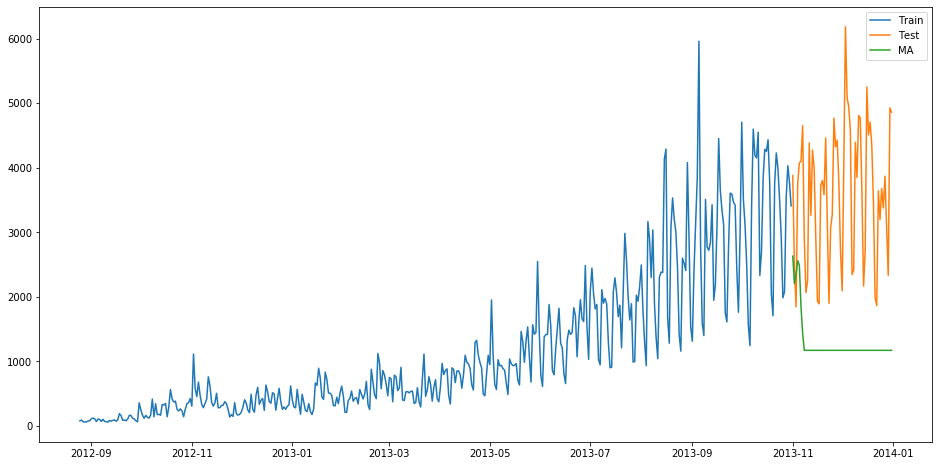

In [133]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_ma, label='MA')
plt.legend(loc='best')
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['Count'], y_hat_ma.to_frame()))
print(rmse)

2552.5501432373494


In [144]:
#自回归移动平均模型（ARIMA）
from statsmodels.tsa.arima_model import ARIMA
 
ts_ARIMA= train['Count'].astype(float)
fit1 = ARIMA(ts_ARIMA, order=(7, 1, 4)).fit()
y_hat_ARIMA = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)

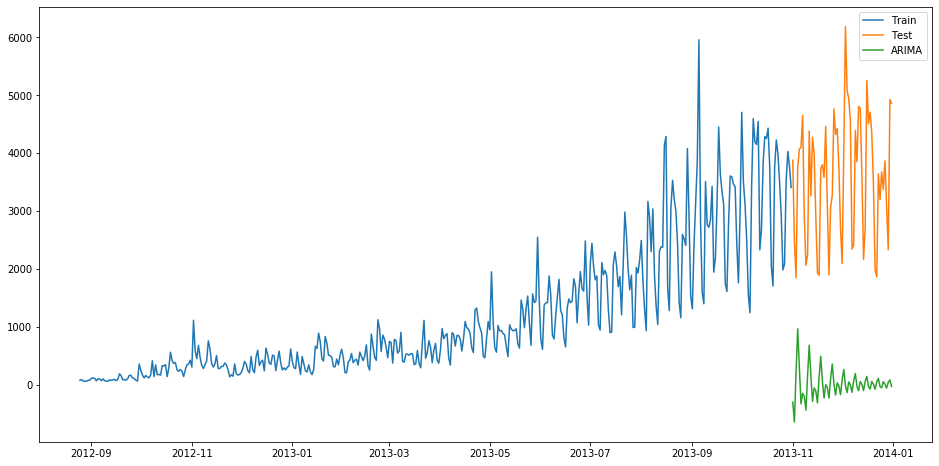

In [145]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_ARIMA, label='ARIMA')
plt.legend(loc='best')
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
  
rmse = sqrt(mean_squared_error(test['Count'],y_hat_ARIMA.to_frame()))
print(rmse)

3723.473534290168


In [146]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Count   No. Observations:                  432
Model:                 ARIMA(7, 1, 4)   Log Likelihood               -3146.424
Method:                       css-mle   S.D. of innovations            350.432
Date:                Sun, 06 Dec 2020   AIC                           6318.848
Time:                        22:14:42   BIC                           6371.737
Sample:                    08-26-2012   HQIC                          6339.728
                         - 10-31-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.6416      1.940      3.939      0.000       3.839      11.444
ar.L1.D.Count     0.2672      0.160      1.673      0.095      -0.046       0.580
ar.L2.D.Count    -0.5104      0.118     -4.329      0.000      -0.741      -0.279
ar.L3.D.Count     0.1651      0.133      1.237      0.217      -0.096       0.427
ar.L4.D.Count    -0.1743      0.070     -2.485      0.013      -0.312      -0.037
ar.L5.D.Count    -0.1857      0.068     -2.736      0.006      -0.319      -0.053
ar.L6.D.Count     0.1278      0.083      1.535      0.126      -0.035       0.291
ar.L7.D.Count     0.3262      0.079      4.127      0.000       0.171       0.481
ma.L1.D.Count    -0.6868      0.162     -4.247      0.000      -1.004      -0.370
ma.L2.D.Count     0.1815      0.170      1.069      0.286      -0.151       0.514
ma.L3.D.Count    -0.5207      0.108     -4.820      0.000      -0.732      -0.309
ma.L4.D.Count     0.1361      0.084      1.627      0.105      -0.028       0.300
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2621           -0.0000j            1.2621           -0.0000
AR.2            0.6543           -0.8389j            1.0639           -0.1446
AR.3            0.6543           +0.8389j            1.0639            0.1446
AR.4           -0.2380           -1.0043j            1.0321           -0.2870
AR.5           -0.2380           +1.0043j            1.0321            0.2870
AR.6           -1.2433           -0.6846j            1.4193           -0.4199
AR.7           -1.2433           +0.6846j            1.4193            0.4199
MA.1           -0.4712           -1.2741j            1.3584           -0.3064
MA.2           -0.4712           +1.2741j            1.3584            0.3064
MA.3            1.0795           -0.0000j            1.0795           -0.0000
MA.4            3.6880           -0.0000j            3.6880           -0.0000
-----------------------------------------------------------------------------
"""

In [150]:
#SARIMA模型
import statsmodels.api as sm
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)

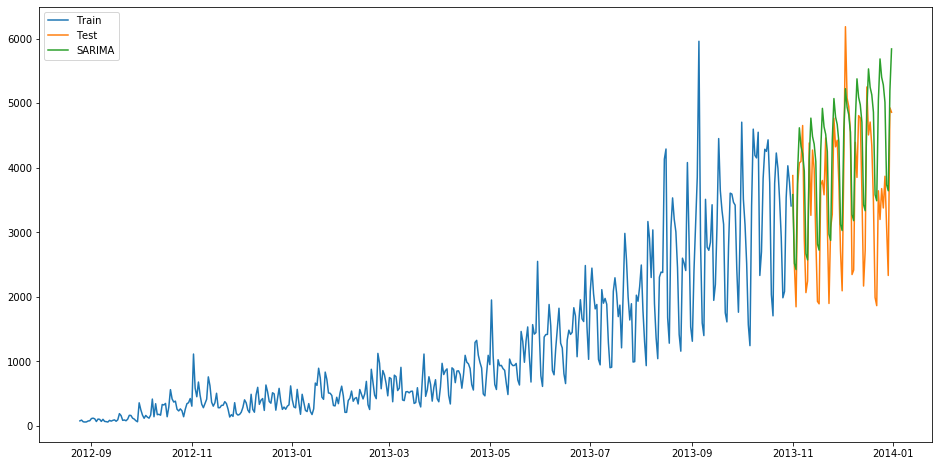

In [151]:
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [152]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SARIMA']))
print(rmse)

933.5651456085614
